In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import time

# Singular Value Decomposition 

In [12]:
def getNorm(vals):
    return math.sqrt(sum(list(map(lambda x: x**2, vals))))

In [13]:
img = cv.imread('lena.png')
# img = cv.resize(img, (550, 550))
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [14]:
mat1 = np.asarray(gray_img, dtype=float)
mat2 = np.array([[3, 1, 1],
                [-1, 3, 1]], dtype=float)
mat3 = np.array([[1, 1],
                [0, 1],
                [1, 0]], dtype=float)

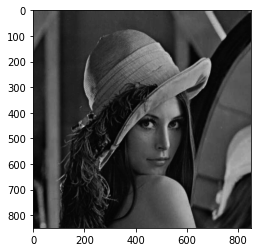

In [15]:
plt.imshow(mat1, cmap="gray")

In [16]:
def getEigenRight(mat, eps=1.e-5):
    m, n = mat.shape
    smat = np.matmul(mat.T, mat)
    V = np.eye(smat.shape[0], dtype=np.float64)
    An = smat.copy()

    itermax = 1//(1.e-5)**2
    itercounter = 0
    flag = np.sum(np.tril(An, -1))
    while (flag < -1 * eps or flag > eps) and (itercounter < itermax):
        Q, R = np.linalg.qr(An)
        V = V @ Q
        An = R @ Q

        flag = np.sum(np.tril(An, -1))
        itercounter += 1

    if (itercounter > itermax):
        raise RuntimeError(f"No convergence to eigenvalue after {itercounter} iteration.")

    eigval = np.diag(An)

    return eigval, V

In [17]:
# Matrix singular
mat = mat1.copy()
row, col = mat.shape
flipped = False

if (row < col):
    mat = mat.T
    row, col = mat.shape
    flipped = True

In [18]:
u = np.zeros((row, row), dtype=np.float64)
eigval, v = getEigenRight(mat, eps=row*col*1.e-5)

sigmaval = [math.sqrt(x) for x in eigval]
sigmaval.sort(reverse = True)
matsig = np.zeros((row, col), dtype=float)
np.fill_diagonal(matsig, sigmaval)

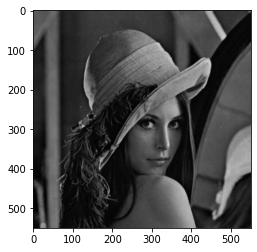

In [ ]:
for i in range(min(row, col)):
    u[:, i] = (mat @ v[:, i]) / sigmaval[i]

res = u @ matsig @ v.T
if flipped:
    res = res.T

plt.imshow(res, cmap="gray")

In [ ]:
percent = 50
rank = int(percent/100*len(sigmaval))
res = np.zeros(matsig.shape, dtype=float)
for i in range(rank):
    ui = np.matrix(u[:, i]).T
    vi = np.matrix(v[i, :])
    res += ui * matsig[i, i] @ vi